# Proyecto 2 - Tercera Parte

En esta parte del proyecto se debe realizar el análisis de modelos , la selección del mejor modelo y selección de mejor combinación de parámetros para cada tipo de modelo.


3.1 Librerías y Carga del Dataset

In [1]:
pip install -U imbalanced-learn 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.utils import resample #para bootstraping.

In [3]:
dataset = pd.read_csv('dataset_salida.csv')
dataset

,Unnamed: 0,Unnamed: 0.1,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1
1,1,1,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1
2,2,2,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
3,3,3,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
4,4,4,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29995,0.212121,0.0,0.500000,0.333333,0.310345,0.2,0.2,0.2,...,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0
29996,29996,29996,0.141414,0.0,0.500000,0.666667,0.379310,0.1,0.1,0.1,...,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0
29997,29997,29997,0.020202,0.0,0.333333,0.666667,0.275862,0.6,0.5,0.4,...,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1
29998,29998,29998,0.070707,0.0,0.500000,0.333333,0.344828,0.3,0.1,0.2,...,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1


In [4]:
X = dataset.drop(['default'], axis=1) 
y = dataset['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=2022)

# Configuración de Modelos

In [10]:
lr = 'LogisticRegression().fit(X_train, y_train)'
svm = 'SVC(gamma="scale", kernel="rbf").fit(X_train, y_train)'
dt = 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)'
knn = 'KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)'
nb = 'GaussianNB().fit(X_train, y_train)'
lda = 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)'
qda = 'QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)'

models_list = {"lr" :lr, "svm":svm, "dt": dt,  "knn":knn, "nb":nb, "lda":lda, "qda":qda}
models_list

{'lr': 'LogisticRegression().fit(X_train, y_train)',
 'svm': 'SVC(gamma="scale", kernel="rbf").fit(X_train, y_train)',
 'dt': 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)',
 'knn': 'KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)',
 'nb': 'GaussianNB().fit(X_train, y_train)',
 'lda': 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)',
 'qda': 'QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)'}

Se crea el dataset nuevamente

In [11]:
dataset = pd.concat([X_train, y_train], axis=1)
dataset

,Unnamed: 0,Unnamed: 0.1,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
5006,5006,5006,0.272727,1.0,0.166667,0.666667,0.172414,0.0,0.0,0.0,...,0.160445,0.081295,0.260979,0.000373,0.000000,0.000364,0.001050,0.000000,0.001233,0
26180,26180,26180,0.222222,1.0,0.333333,0.333333,0.155172,0.1,0.1,0.1,...,0.161010,0.081070,0.261690,0.002227,0.000000,0.001674,0.000000,0.002345,0.000000,0
8935,8935,8935,0.191919,1.0,0.500000,0.666667,0.431034,0.0,0.0,0.0,...,0.162273,0.092229,0.260979,0.003248,0.003498,0.002530,0.018807,0.000000,0.000000,0
11251,11251,11251,0.181818,0.0,0.333333,0.333333,0.637931,0.4,0.2,0.2,...,0.266663,0.195108,0.351497,0.007539,0.003492,0.003674,0.005473,0.008133,0.009458,0
14268,14268,14268,0.323232,0.0,0.166667,0.666667,0.189655,0.1,0.4,0.4,...,0.163914,0.080648,0.262752,0.000000,0.000000,0.004474,0.000000,0.005409,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14001,14001,14001,0.494949,0.0,0.166667,0.333333,0.551724,0.3,0.3,0.1,...,0.162775,0.081495,0.269320,0.000000,0.004417,0.000000,0.001375,0.023445,0.025182,0
4720,4720,4720,0.404040,0.0,0.166667,0.333333,0.293103,0.1,0.1,0.1,...,0.171347,0.081122,0.261276,0.003113,0.000000,0.013281,0.000770,0.000907,0.000000,0
16557,16557,16557,0.272727,0.0,0.333333,0.666667,0.103448,0.0,0.0,0.0,...,0.162433,0.082207,0.262187,0.003309,0.000942,0.002728,0.002554,0.003702,0.002987,0
1244,1244,1244,0.000000,0.0,0.500000,0.666667,0.241379,0.2,0.2,0.2,...,0.169250,0.089983,0.268015,0.001344,0.000665,0.000346,0.000509,0.002345,0.003783,0


## Creamos Boost y Modelos

In [13]:
train_models_list = {}

for model_name, model in models_list.items():
    boot= resample(dataset, replace=True, n_samples=100, random_state=2022)
    X_train= boot.drop('default', axis=1)
    y_train= boot.default 
    train_model= eval(model)
    train_models_list[model_name]= train_model

train_models_list

c:\Users\sandy\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


{'lr': LogisticRegression(),
 'svm': SVC(),
 'dt': DecisionTreeClassifier(max_depth=4),
 'knn': KNeighborsClassifier(),
 'nb': GaussianNB(),
 'lda': LinearDiscriminantAnalysis(store_covariance=True),
 'qda': QuadraticDiscriminantAnalysis(store_covariance=True)}

## Predicciones con los Modelos

In [14]:
auc_scores = {}
results_matrix = pd.DataFrame(columns=np.arange(0, len(y_test), 1).tolist())

for model_name, train_model in train_models_list.items():
    predicciones = train_model.predict(X_test)
    auc = roc_auc_score(y_test, predicciones)
    auc_scores[model_name] = auc
    tempDf = pd.DataFrame(predicciones).T
    results_matrix = results_matrix.append(tempDf)
    
    
    
results_matrix.index=list(train_models_list.keys())

 
results_matrix

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
lr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
svm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dt,0,1,0,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
knn,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nb,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lda,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
qda,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Valoracion de los Resultados

In [15]:
votacion = results_matrix.apply(pd.value_counts)
votacion

,0,1,2,3,4,5,6,7,8,9,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
0,7.0,6,6,4,5,7.0,6,7.0,5,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,6
1,NaN,1,1,3,2,NaN,1,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [16]:
final_predictions = []

for (columnName, columnData) in votacion.iteritems():
    column_result = columnData.values
    final_predictions.append(np.nanargmax(column_result, axis=0))

final_predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [17]:
auc = roc_auc_score(y_test, final_predictions)
auc

0.5015186028853454

In [18]:
auc_scores

{'lr': 0.5,
 'svm': 0.5,
 'dt': 0.6307953889340449,
 'knn': 0.5049374050569184,
 'nb': 0.5168826614172232,
 'lda': 0.6289319143492407,
 'qda': 0.5}

# Random Forest - Adaboost

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler #Estandarizador
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier

In [20]:
grid_rf = {
    'n_estimators':[100, 200, 300],
    'max_depth': [4, 6],
    'criterion':['gini', 'entropy']
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
rfc = RandomForestClassifier()

In [23]:
rfc_gs_cv = GridSearchCV(estimator=rfc, param_grid=grid_rf, cv=10)
rfc_gs_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'n_estimators': [100, 200, 300]})

In [24]:
GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'n_estimators': [100, 200, 300]})

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [4, 6],
                         'n_estimators': [100, 200, 300]})

In [25]:
rfc_gs_cv.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100}

In [26]:
preds_rfc = rfc_gs_cv.predict(X_test)

In [27]:
accuracy_score(y_test, preds_rfc)

0.8008333333333333

In [44]:
f1_score(y_test, preds_rfc)

0.40635866865375064

In [28]:
roc_auc_score(y_test, preds_rfc)

0.6246343946528835

In [46]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, preds_rfc)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

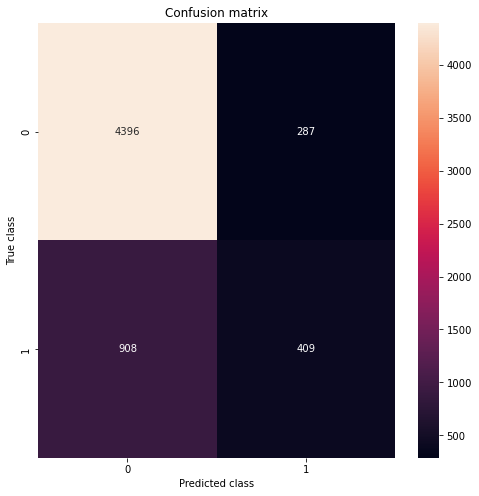

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4683
           1       0.59      0.31      0.41      1317

    accuracy                           0.80      6000
   macro avg       0.71      0.62      0.64      6000
weighted avg       0.78      0.80      0.78      6000



In [50]:
pred_y = rfc_gs_cv.predict(X_test)
mostrar_resultados(y_test, pred_y)

Como se observa en los resultados, el valor de ROC es 0.62 si fuera 0.5 daría igual que los datos sean aleatorios. No obstante, el modelo no sería el más adecuado para predecir.

La puntuación de precisión es del 80 %, pero si consideramos que la proporción de la clase mayoritaria es del 78 %, sería preferible mejorarla aún más.

La tasa de recuperación muestra qué proporción de la clase se identifica correctamente. En este caso, solo el 31% de los morosos se clasificó correctamente en los datos de prueba. Una tasa de recuperación baja significaría que el modelo probablemente fallaría en predecir correctamente los morosos, por lo tanto, no lograría el objetivo de este análisis.

La puntuación de precisión mide el porcentaje de clasificación positiva que se clasificó correctamente. En este caso, el resumen muestra que el 59 % de los morosos previstos se identificó correctamente en los datos de prueba.

Para el objetivo de este análisis, sería preferible que la cantidad de falsos positivos se minimice ya que las implicaciones de identificar erróneamente a un cliente como un posible moroso puede dañar la reputación de la institución financiera además de la probabilidad de perder clientes con buenos puntajes de crédito. Así, para este caso pondríamos más énfasis en la precisión del modelo

# Gradient Boosting

Es un tipo de ensamble que combina varios weak learners para construir un strong learner, la naturaleza aditiva lo hace muy susceptible a sobreajuste por ello se realizará un grid search con validación cruzada para minimizar el sobre ajuste.

El código fue consultado de la siguiente página: https://www.kaggle.com/code/raizman/credit-card-customer-default-prediction 

In [51]:
from sklearn.ensemble import GradientBoostingClassifier


tree_list = [15, 25, 50, 100, 200, 400]

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid,
                      scoring='f1',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)


In [52]:
print("no of trees", GV_GBC.best_estimator_.n_estimators, "learning rate",GV_GBC.best_estimator_.learning_rate, 
      "subsample",GV_GBC.best_estimator_.subsample, "max features", GV_GBC.best_estimator_.max_features)

no of trees 50 learning rate 0.1 subsample 1.0 max features 4


Precision del Modelo

In [54]:
print(classification_report(y_test, preds_rfc))
print('Accuracy score: ', round(accuracy_score(y_test, preds_rfc), 2))
print('F1 Score: ', round(f1_score(y_test, preds_rfc), 2))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4683
           1       0.59      0.31      0.41      1317

    accuracy                           0.80      6000
   macro avg       0.71      0.62      0.64      6000
weighted avg       0.78      0.80      0.78      6000

Accuracy score:  0.8
F1 Score:  0.41


El Modelo Gradient Boosting Model produjo una precisión de 0.8. Sin embargo, en est emodelo solamente el 
0.31 de los morosos fue correctamente clasificado en la data de prueba. La tasa de precisión para la clasificación de los positivos fue de 59%. 
Para el objetivo de este análisis sería preferible que el número de falsos positivos sea menor ya que si el modelo clasifica incorrectamente a estos tarjetahabientes implicaría problemas para la institución financiera.

# Regresion Logistica

Como se observó en el análisis de datos, los datos se encuentran desbalanceados ya que tenemos muy pocos clientes con incumplimiento de pago. Es por ello que haremos el tratamiento de datos para evitar que el modelo no sea capaz de detectar correctamente los casos de incumplimiento.

c:\Users\sandy\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\sandy\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\sandy\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\sandy\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


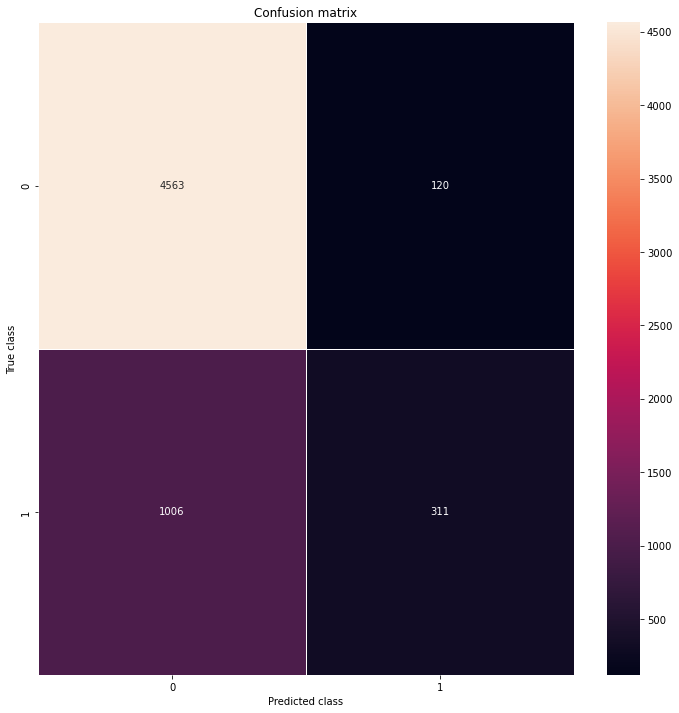

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4683
           1       0.72      0.24      0.36      1317

    accuracy                           0.81      6000
   macro avg       0.77      0.61      0.62      6000
weighted avg       0.80      0.81      0.77      6000



In [5]:
def run_model(X_train, X_test, y_train, y_test ):
    clf_base = LogisticRegression(C=1.0, penalty= 'l2', random_state=1, solver="newton-cg")
    clf_base.fit(X_train, y_train)
    return clf_base

model= run_model(X_train, X_test, y_train, y_test)

def mostrar_resultados(y_test, pred_y):
    conf_matrix= confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12,12))
    sns.heatmap(conf_matrix, linewidths=1, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print(classification_report(y_test, pred_y))

pred_y= model.predict(X_test)
mostrar_resultados(y_test, pred_y)

Como se puede observar en lamatriz de confusión vemos 1006 fallos y 311 aciertos, dando un recall 0.24. También observamos los resultados de f1-score el cual es muy bajo. El modelo
no es capaz de detectar correctamente los casos de incumplimiento de pago.



# Ensamble de modelos con Balanceo - Bagging

Para esta estrategis se usará un clasificador de ensamble que utiliza Bagging y el modelo estimador será un Decision Tree.

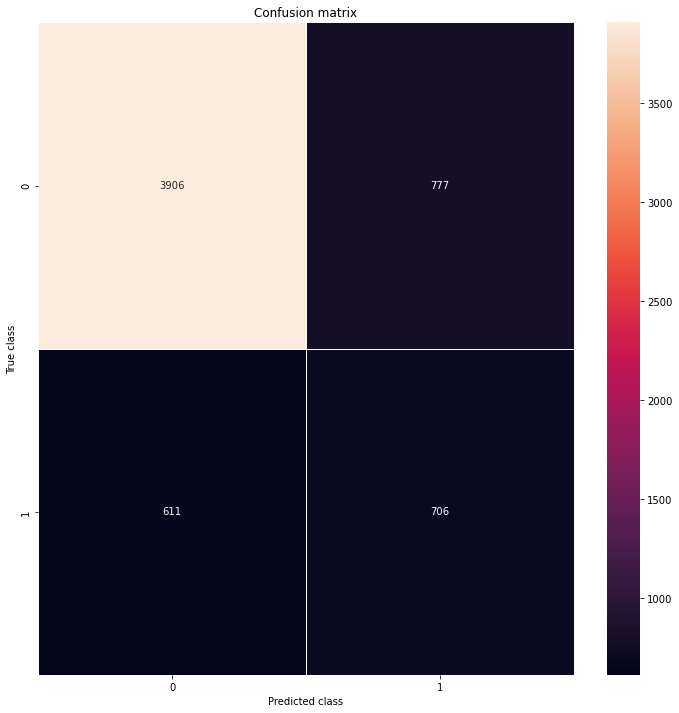

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4683
           1       0.48      0.54      0.50      1317

    accuracy                           0.77      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.77      0.77      6000



In [7]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)
mostrar_resultados(y_test, pred_y)


La precisión del modelo disminuyó a 77% en comparación con los modelos anteriores, aunque la tasa de recall aumentó a 54%, la precisión para la predicción de morosos disminuyó a 48%.
En este caso se descartaría este modelo también ya que no es confiable para predecir el riesgo de default.